PROBLEM 3

In [143]:
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

3.1 Importing the data from the places.txt we have to do some preprocessing accodring to our requirments

In [144]:
#loading data
data = pd.read_csv('places.txt',delim_whitespace=True,header=None)

In [145]:
#data.transpose()
data.to_csv('places.csv', index=None)

From the below code we can say that we used places.txt and converted them csv and read the dataframes can convert the each value into each column in preprocessing steps

In [146]:
data1=pd.read_csv("places.csv", header=None)
data1 = data1.iloc[1: , :]
data1.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,1,-99.6890,32.5590,110932,44
2,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,2,-81.5180,41.0850,660328,36
3,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,3,-84.1580,31.5750,112402,11
4,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,4,-73.7983,42.7327,835880,35
5,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,5,-106.6500,35.0830,419700,33


As per the question we are removing the last few columns to manipulate the data 

In [147]:
data2=data1.iloc[:,1:10]
data2.head(4)

,1,2,3,4,5,6,7,8,9
1,521,6200,237,923,4031,2757,996,1405,7633
2,575,8138,1656,886,4883,2438,5564,2632,4350
3,468,7339,618,970,2531,2560,237,859,5250
4,476,7908,1431,610,6883,3399,4655,1617,5864


3.2  we are replacing the  each value in the matrix by its base-10 logarithm.

In [148]:
data3 = np.log10(data2)
data3.head(4)

,1,2,3,4,5,6,7,8,9
1,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
2,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
3,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
4,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194


In [149]:
X=data3
X.shape

(329, 9)

3.3 We are centering the data points first by computing the mean
data vector µ and subtracting it from every point.

In [150]:
x_bar=np.mean(X)
x_bar
X=X-x_bar
X.head(4)

,1,2,3,4,5,6,7,8,9
1,-0.001656,-0.115099,-0.580738,0.013575,0.008211,-0.006170,-0.207950,-0.078891,0.148513
2,0.041174,0.003027,0.263574,-0.004193,0.091485,-0.059573,0.539178,0.193719,-0.095693
3,-0.048248,-0.041854,-0.164498,0.035145,-0.193910,-0.038367,-0.831461,-0.292574,-0.014023
4,-0.040887,-0.009424,0.200153,-0.166297,0.240576,0.084745,0.461710,-0.017857,0.034012


we are performing the SVD for the above data X

In [151]:
# Performing SVD
u, s, v = np.linalg.svd(X, full_matrices=True)

In [152]:
principal=v
principal

array([[ 0.03507288,  0.09335159,  0.40776448,  0.10044536,  0.15009714,
         0.03215319,  0.87434057,  0.15899622,  0.01949418],
       [ 0.0088782 ,  0.00923057, -0.85853187,  0.22042372,  0.05920111,
        -0.06058858,  0.30380632,  0.33399255,  0.0561011 ],
       [-0.14087477, -0.12884967, -0.27605769, -0.5926882 , -0.22089816,
        -0.0081447 ,  0.36328732, -0.58362605, -0.12085337],
       [ 0.15274476, -0.17838233, -0.03516139,  0.72366303, -0.12620531,
        -0.00519693,  0.08111571, -0.62822609,  0.05216997],
       [-0.39751159, -0.1753133 , -0.05032469,  0.01345714,  0.86996951,
         0.04779772, -0.05506994, -0.21328989, -0.02965242],
       [ 0.83129501,  0.20905725, -0.08967085, -0.16401885,  0.37244964,
         0.02362804, -0.02812147, -0.14179906, -0.26481279],
       [-0.0559096 ,  0.6958923 , -0.06245284, -0.05553037,  0.0724604 ,
         0.05738567, -0.0232698 , -0.23451524,  0.66448592],
       [-0.31490125,  0.61361583, -0.0210358 ,  0.1823479 , -0

In [153]:
from sklearn.utils.validation import check_is_fitted
pca=PCA(n_components=9).fit(X)



3.4 we are taking first two principal components v1 and v2.

In [154]:
pc =[X.T.dot(u[:,i]) for i in range(9)]

In [155]:
v1 = pc[0]
v2 = pc[1]

In [156]:
datapoints = [X.dot(v1),X.dot(v2)]

In [157]:
l=2
pcs=sc=us=u[:,:len(s)] @ np.diag(s)
vc1=us[:,0]
vc2=us[:,1]

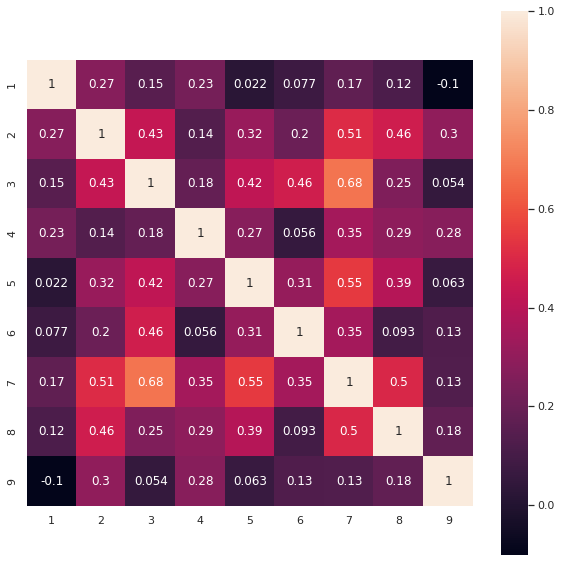

In [158]:
from numpy.core.numeric import correlate
def coo(train):
  coo=train.corr()
  fig,ax=plt.subplots(figsize=(10,10))
  sns.heatmap(coo, vmax=1, square=True,annot=True)
  plt.show();
coo(pd.DataFrame(X))

3.5 we are projecting the data points onto the first two principal components.

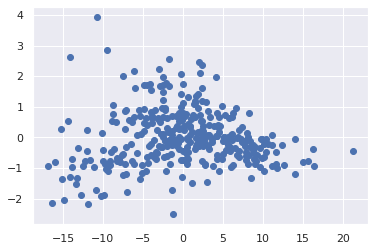

In [159]:
plt.scatter(datapoints[0],datapoints[1])

Now, we can use some estimation to define the outliers in data points in the data frame

In [160]:
def estimate(datavalues):

    m = np.mean(datavalues)
    s = np.std(datavalues)
    li = s * 1.5

    min = m - li
    max = m + li

    return m, s, min, max

Now, we can project the outliers in the scatter plot

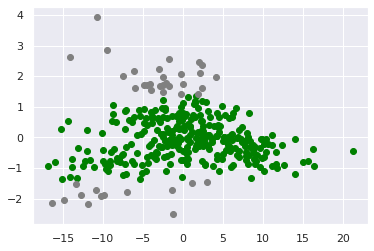

In [161]:
m, s, min, max = estimate(datapoints[1])

p = []
i = 0
for x, y in zip(datapoints[0],datapoints[1]):
    color = 'green'  # non-outlier color
    if not min <= y <= max:  # condition for being an outlier
        color = 'grey'  # outlier color
        p.append(i)
    i +=1
    plt.scatter(x, y, color=color)
plt.show()

Now, by the above outliesr we can able to print the cities which are comes under the outliers

In [162]:
df = pd.read_csv('places.txt',delim_whitespace=True,header=None)

outpoints = [df.values[i,0] for i in p]
for i in range (0,len(outpoints)):
  print(outpoints[i])
coun=len(outpoints)
print('')
print('The number of outliers of cities',coun)

Abilene,TX
Anderson,SC
Augusta,GA-SC
Baton-Rouge,LA
Bellingham,WA
Brownsville-Harlington,TX
Burlington,NC
Chico,CA
Corpus-Christi,TX
Danville,VA
Eugene-Springfield,OR
Fresno,CA
Gadsden,AL
Glens-Falls,NY
Hickory,NC
Iowa-City,IA
Lake-Charles,LA
Las-Vegas,NV
Medford,OR
Midland,TX
Monroe,LA
Panama-City,FL
Parkerburg-Marietta,WV-OH
Provo-Orem,UT
Redding,CA
Rochester,MN
St.-Joseph,MO
Salinas-Seaside-Monterey,CA
San-Angelo,TX
Santa-Barbara-Santa-Maria-Lompoc,CA
Sharon,PA
Stockton,CA
Tacoma,WA
Tallahassee,FL
Visalia-Tulare-Porterville,CA
Materbury,CT
West-Palm-Beach-Boca-Raton-Delray-Beach,FL
Williamsport,PA
Worcester,MA
Yakima,WA

The number of outliers of cities 40


3.6 we can use the normalized z-score of each data point 

In [163]:
z = (X-X.mean())/X.std()
u, s, v = np.linalg.svd(z, full_matrices=True)

In [164]:
from sklearn.utils.validation import check_is_fitted
pca=PCA(n_components=9).fit(z)


In [165]:
l=2
pcs=sc=us=u[:,:len(s)] @ np.diag(s)
vc3=us[:,0]
vc4=us[:,1]

Again we are taking first two principal components v1 and v2

In [166]:
l= ['V'+str(i) for i in range(1,3)]
z_score = pd.DataFrame(u[:,0:2], index=data1[0].tolist(), columns=l)
z_score = z_score.reset_index()
z_score.rename(columns={'index':'0'}, inplace=True)
z_score.head(10)

,0,V1,V2
0,"Abilene,TX",-0.036452,0.073899
1,"Akron,OH",0.028530,-0.012453
2,"Albany,GA",-0.071377,0.017028
3,"Albany-Schenectady-Troy,NY",0.041937,-0.080885
4,"Albuquerque,NM",0.074109,0.009603
5,"Alexandria,LA",-0.068012,-0.030903
6,"Allentown,Bethlehem,PA-NJ",-0.024112,-0.063622
7,"Alton,Granite-City,IL",-0.008833,-0.036450
8,"Altoona,PA",-0.074246,-0.075599
9,"Amarillo,TX",-0.010378,0.013091


we are projecting the data points onto the first two principal components.

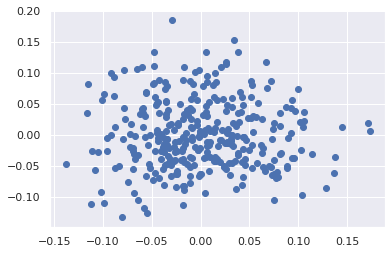

In [167]:
plt.scatter(x="V1", y="V2", data=z_score)

Again, we can project the outliers in the scatter plot

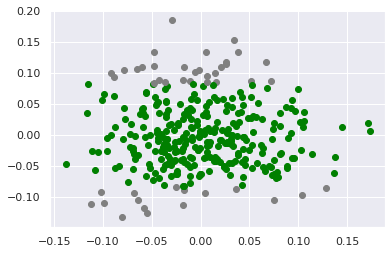

In [168]:
m, s, min, max = estimate(z_score['V2'])

po = []
i = 0
for x, y in zip(z_score['V1'],z_score['V2']):
    color = 'green'  # non-outlier color
    if not min <= y <= max:  # condition for being an outlier
        color = 'grey'  # outlier color
        po.append(i)
    i +=1
    plt.scatter(x, y, color=color)
plt.show()

Now,by the above outliesr we can able to print the cities which are comes under the outliers

In [169]:
df = pd.read_csv('places.txt',delim_whitespace=True,header=None)

outcities = [df.values[i,0] for i in po]
for i in range (0,len(outcities)):
  print(outcities[i])
coun1=len(outcities)
print('')
print('The number of outliers of cities',coun1)

Anchorage,AK
Atlantic-City,NJ
Bakersfield,CA
Beaver-County,PA
Boulder-Longmont,CO
Bradenton,FL
Brownsville-Harlington,TX
Chicago,IL
Colorado-Springs,CO
Cumberland,MD-WV
Danville,VA
Daytona-Beach,FL
Duluth,MN-WI
Fort-Collins-Lover=land,CO
Fort-Lauderdale-Hollywood-Pompano-Beach,FL
Fort-Pierce,FL
Fresno,CA
Harrisburg-Lebanon-Carlisle,PA
Houma-Thibodaux,LA
Johnstown,PA
Kokomo,IN
Lafayette,LA
Lake-Charles,LA
Lancaster,PA
Las-Vegas,NV
Melbourne-Titusville-Palm-Bay,FL
Midland,TX
Ocala,FL
Odessa,TX
Panama-City,FL
Philadelphia,PA-NJ
Pittsburgh,PA
Richland-Kinnewick-Pasco,WA
Salinas-Seaside-Monterey,CA
San-Angelo,TX
Sarasota,FL
Scranton-Wilkes-Barre,PA
Sharon,PA
Stockton,CA
Victoria,TX
Visalia-Tulare-Porterville,CA
West-Palm-Beach-Boca-Raton-Delray-Beach,FL
Wheeling,WV-OH
Williamsport,PA
Worcester,MA

The number of outliers of cities 45


We can see the differnce we using Replace each value in the matrix by its base-10 logarithm and use the normalized z-score of each data point. For the 1st one we had outliers only 40 and for second we had outlies 45